In [3]:
from duckduckgo_search import ddg_images
from fastcore.all import *

In [5]:
def serch_images(term,max_images=30):
    print('searching for',term)
    return L(ddg_images(term,max_results=max_images)).itemgot('image')

In [26]:
urls=serch_images('Bird photos',max_images=40)

searching for Bird photos


In [32]:
from fastdownload import download_url
download_url(urls[0],'bird.jpg',show_progress=True)

Path('bird.jpg')

In [31]:
from fastai.vision.all import *

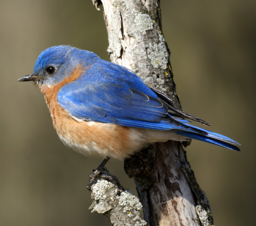

In [36]:
im=Image.open('bird.jpg')
im.to_thumb(256,256)

searching for forest photos


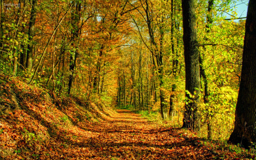

In [38]:
download_url(serch_images('forest photos',max_images=1)[0],'forest.jpg',show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [41]:
searches=['forest','bird']
path=Path('bird_or_not')
from time import sleep
for s in searches:
    dest=(path/s)
    dest.mkdir(exist_ok=True,parents=True)
    download_images(dest,urls=serch_images(f'{s} photo'))
    sleep(10)
    download_images(dest,urls=serch_images(f'{s} sun photo'))
    sleep(10)
    download_images(dest,urls=serch_images(f'{s} shade photo'))
    sleep(10)
    resize_images(path/s,max_size=400,dest=path/s)

searching for forest photo


/Volumes/TAPPS/DS_APPS/anaconda3/envs/tensorflow/lib/python3.9/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/Volumes/TAPPS/DS_APPS/anaconda3/envs/tensorflow/lib/python3.9/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/Volumes/TAPPS/DS_APPS/anaconda3/envs/tensorflow/lib/python3.9/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


searching for forest sun photo
searching for forest shade photo
██searching for bird photo
searching for bird sun photo
searching for bird shade photo


In [42]:
import warnings

# Ignore the specific UserWarnings
warnings.filterwarnings("ignore", category=UserWarning, module="duckduckgo_search")


In [43]:
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

4

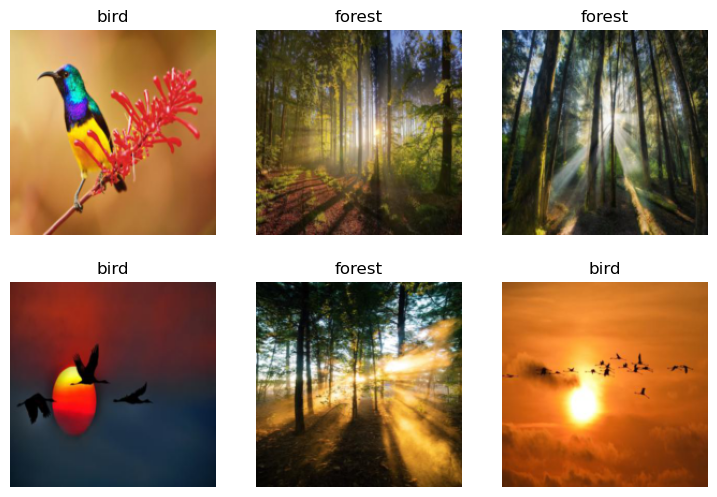

In [46]:
dls=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192,method='squish')]
).dataloaders(path,bs=32)
dls.show_batch(max_n=6)

In [50]:
learn=vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(3)

epoch     train_loss  valid_loss  error_rate  time    
0         0.637336    0.201875    0.076923    00:02                                    
epoch     train_loss  valid_loss  error_rate  time    
0         0.155543    0.051203    0.025641    00:02                                    
1         0.116928    0.062360    0.051282    00:02                                    
2         0.078300    0.058108    0.025641    00:02                                    


In [53]:
is_bird,_,probs=learn.predict(PILImage.create('bird.jpg'))
print(f'Is this a bird:{is_bird}')
print(f'Probability of a bird: {probs[0]:.4f}')

Is this a bird:bird                                                  
Probability of a bird: 1.0000
